In [25]:
backend = 'onnxruntime'
# backend = 'sklearn'
# backend = 'sql_duckdb'
# backend = 'lleaves'
# backend = 'treelite'

model = 'medical_charges_d10_l943_n1885_20241201075016'

if backend == 'onnxruntime':
    result_file = 'result.csv'
else:
    result_file = f'result_{backend}.csv'

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
1099,medical_charges_d10_l943_n1885_20241201075016,0,0.000000,medical_charges,1G,1,2.348689
1100,medical_charges_d10_l943_n1885_20241201075016,1,8.134506,medical_charges,1G,1,0.795932
1101,medical_charges_d10_l943_n1885_20241201075016,2,8.134506,medical_charges,1G,1,0.596169
1102,medical_charges_d10_l943_n1885_20241201075016,1,8.201214,medical_charges,1G,1,0.778855
1103,medical_charges_d10_l943_n1885_20241201075016,2,8.201214,medical_charges,1G,1,0.606524
1104,medical_charges_d10_l943_n1885_20241201075016,1,8.254128,medical_charges,1G,1,0.802890
1105,medical_charges_d10_l943_n1885_20241201075016,2,8.254128,medical_charges,1G,1,0.613164
1106,medical_charges_d10_l943_n1885_20241201075016,1,8.275614,medical_charges,1G,1,0.863102
1107,medical_charges_d10_l943_n1885_20241201075016,2,8.275614,medical_charges,1G,1,0.731693
1108,medical_charges_d10_l943_n1885_20241201075016,1,8.314472,medical_charges,1G,1,0.859478


In [27]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 2.4383307963609697)

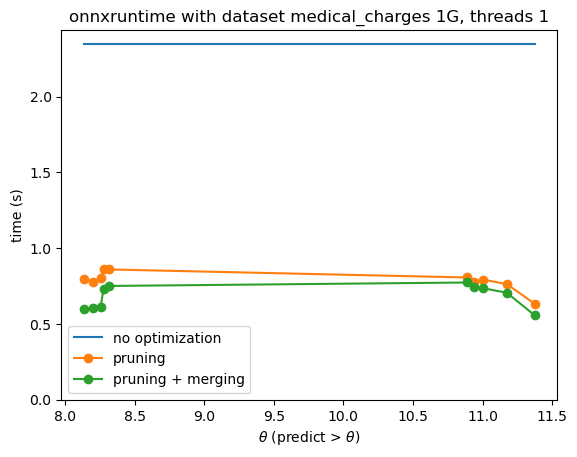

In [28]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization')
plt.plot(x, y1, marker='o', label='pruning')
# plt.bar(x, y1, width=0.1, label='pruning')
if len(y2) > 0:
    # x2 = [e + 0.1 for e in x]
    plt.plot(x, y2, marker='o', label='pruning + merging')
    # plt.bar(x2, y2, width=0.1, label='pruning + merging')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 2.4661237482214347)

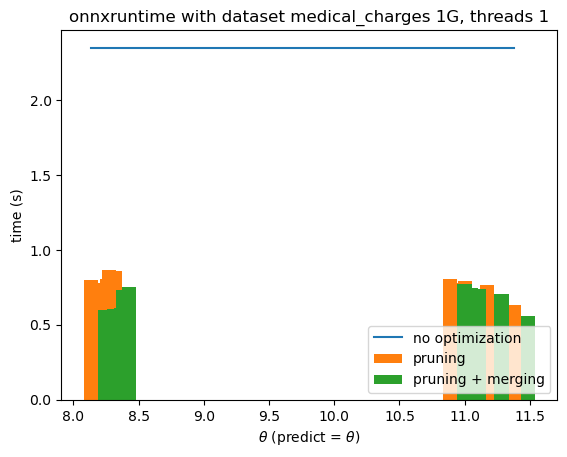

In [29]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization', color='tab:blue')
# plt.plot(x, y1, marker='o', label='pruning')
width = (x[-1] - x[0]) / len(x) / 3
plt.bar(x, y1, width=width, label='pruning', color='tab:orange')
if len(y2) > 0:
    x2 = [e + width for e in x]
    # plt.plot(x, y2, marker='o', label='pruning + merging')
    plt.bar(x2, y2, width=width, label='pruning + merging', color='tab:green')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
# plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.xlabel('$\\theta$ (predict = $\\theta$)')
plt.legend(loc='lower right')
plt.ylim(0)

(0.0, 4.386599179177948)

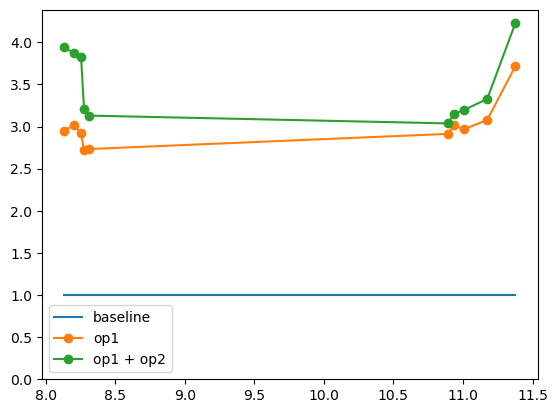

In [30]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)